In [1]:
#import the spreadsheet in to a new Pandas dataframe. check the first few rows 
import pandas as pd
pumpkins = pd.read_csv('US-pumpkins.csv')
#filter the data by selecting only pumpkins with the string 'bushel' in their Package column.
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins.isnull().sum() #check for missing datas

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [3]:
columns_to_selection = ['Package','Variety','City Name','Low Price','High Price','Date']
pumpkins = pumpkins.loc[:,columns_to_selection] #select the columns to work with

In [4]:
#determine the average price of a pumpkin in a given month
average_price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

# print (month)
# print(avrage_price)

In [5]:
from datetime import datetime
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt - datetime(dt.year,1,1)).days)

C:\Users\蓝白皋\AppData\Local\Temp\ipykernel_21436\1095401781.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt - datetime(dt.year,1,1)).days)


In [6]:
# a fresh Pandas dataframe
new_pumpkins = pd.DataFrame({'Month': month, 'DayOfYear': day_of_year, 'City Name':pumpkins['City Name'],'Package': pumpkins['Package'], 'Variety':pumpkins['Variety'],'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Average Price': average_price})

# new_pumpkins.head()
#print(new_pumpkins['Package'])


In [7]:
# normalize the pricing so that it can show the pricing per bushel 
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Average Price'] = average_price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Average Price'] = average_price/(1/2)
#print(new_pumpkins)

#import the data into a new CSV file
new_pumpkins.to_csv('cleaned_pumpkins.csv', index=False)

## Visualize DATA

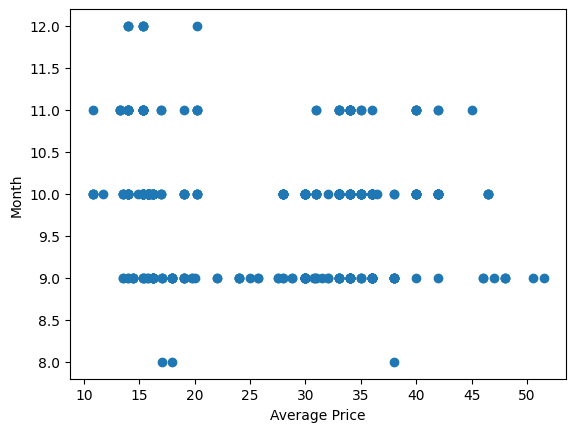

In [8]:
import matplotlib.pyplot as plt
average_price = new_pumpkins['Average Price']
month = new_pumpkins['Month']
#
plt.scatter(average_price, month )
plt.xlabel('Average Price')
plt.ylabel('Month')
plt.show()

Text(0.5, 1.0, 'Average Price of Pumpkins by Month')

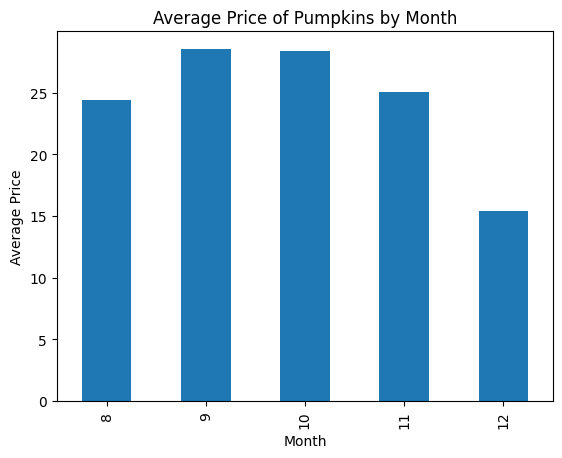

In [9]:
#  create a grouped bar chart
new_pumpkins.groupby(['Month'])['Average Price'].mean().plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Price of Pumpkins by Month')